# Title: Design and implementation of a system for classifying two-dimensional, nonlinearly separable data with the use of artificial neural network.

### Goal: The aim of the project is to construct a classifier of two-dimensional, nonlinearly separable data, using an artificial neural network (the so-called multilayer perceptron) and to conduct tests of the system's operating. 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Project:"></form>''')

### Ad. 1. Creation of two primary datasets: training and test datasets.

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

with open("tn_nonlin_test2.txt") as f:
    content = f.read().splitlines()

x = [float(i.split(',')[0]) for i in content]
y = [float(i.split(',')[1]) for i in content]
labels1 = [float(i.split(',')[2]) - 1 for i in content]
data1 = []
for i in range(len(x)):
    data1.append([x[i],y[i]])
colours = ('green', 'orange', 'blue', 'red')
data = np.array(data1)
labels = np.array(labels1)


X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)


learning_rates = [0.1, 0.2, 0.4, 0.6, 0.8, 0.9]
momentum_factors= [0.2, 0.4, 0.6, 0.7, 0.8, 0.9]

In [21]:
mapping = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])

fin_y_train = np.array([mapping[int(x)] for x in y_train])
fin_y_test = np.array([mapping[int(x)] for x in y_test])

#### Table 1. The primary learning dataset (158 data samples): 

In [3]:
import pandas as pd
joined_array1 = list(zip(X_train, y_train))
sorted_array1 = sorted(joined_array1, key=lambda x: x[1])
df = pd.DataFrame(sorted_array1, columns=['Column 1', 'Column 2'])
df = df.rename(columns={'Column 1': 'x1, x2', 'Column 2': 'Class'})
pd.set_option('display.max_rows', None)

print(df)

                                       x1, x2  Class
0                 [-2.0, -0.0377358490566042]    0.0
1                    [-2.98461538461539, 2.0]    0.0
2        [-1.93846153846154, 3.9622641509434]    0.0
3      [0.0307692307692289, 5.09433962264151]    0.0
4                     [2.0, 5.92452830188679]    0.0
5        [4.09230769230769, 5.09433962264151]    0.0
6        [6.06153846153846, 4.11320754716981]    0.0
7        [7.16923076923077, 2.07547169811321]    0.0
8      [7.96923076923077, 0.0377358490566042]    0.0
9                    [8.27692307692307, -2.0]    0.0
10      [7.78461538461538, -3.88679245283019]    0.0
11                   [6.86153846153846, -6.0]    0.0
12      [5.87692307692308, -7.81132075471698]    0.0
13      [4.15384615384615, -9.16981132075472]    0.0
14      [2.06153846153846, -10.0754716981132]    0.0
15    [-0.0307692307692324, 1.74254182983268]    1.0
16                     [2.0, 3.1061587753649]    1.0
17        [4.21538461538461, 1.8940548237807] 

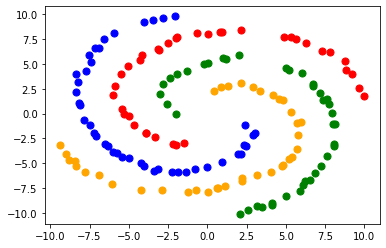

In [29]:
fig, ax = plt.subplots()

for n_class in range(4):
    ax.scatter(X_train[y_train==n_class][:, 0], 
               X_train[y_train==n_class][:, 1], 
               c=colours[n_class], 
               s=50,
               label=str(n_class))

In [30]:
print("Fig. 1. Graphical representation of the primary learning dataset of Table 1")

Fig. 1. Graphical representation of the primary learning dataset of Table 1


#### Table 2. The primary test dataset (78 data samples): 

In [31]:
joined_array2 = list(zip(X_test, y_test))
sorted_array2 = sorted(joined_array2, key=lambda x: x[1])
df = pd.DataFrame(sorted_array2, columns=['Column 1', 'Column 2'])
df = df.rename(columns={'Column 1': 'x1, x2', 'Column 2': 'Class'})
pd.set_option('display.max_rows', None)

print(df)

                                       x1, x2  Class
0         [6.12307692307692, 3.1061587753649]    0.0
1        [7.23076923076923, -4.9997864008544]    0.0
2       [-2.67692307692308, 2.65161979352083]    0.0
3                    [8.27692307692307, -2.0]    0.0
4                    [5.2, -8.33307226771093]    0.0
5       [7.78461538461538, -3.88679245283019]    0.0
6       [3.10769230769231, -9.46941972232111]    0.0
7        [3.04615384615384, 5.83339266642933]    0.0
8       [4.58461538461538, -8.56034175863297]    0.0
9         [2.3076923076923, 5.75763616945532]    0.0
10     [-2.61538461538462, 0.757707369170523]    0.0
11      [5.69230769230769, -7.80277678889284]    0.0
12                    [-1.2, 4.3940192239231]    0.0
13      [7.78461538461538, 0.378924884300462]    0.0
14       [3.35384615384615, 5.37885368458526]    0.0
15       [4.64615384615384, 4.69704521181915]    0.0
16      [8.09230769230769, -2.12103951584194]    0.0
17      [6.86153846153846, -5.90886436454254] 

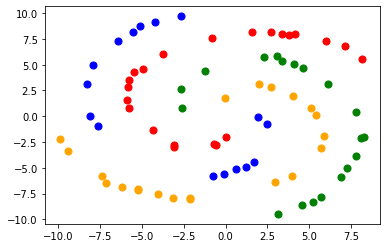

In [32]:
fig, ax = plt.subplots()

for n_class in range(4):
    ax.scatter(X_test[y_test==n_class][:, 0], 
               X_test[y_test==n_class][:, 1], 
               c=colours[n_class], 
               s=50, 
               label=str(n_class))

In [8]:
print("Fig. 2. Graphical representation of the primary test dataset of Table 2")

Fig. 2. Graphical representation of the primary test dataset of Table 2


### Ad. 2. Process of data preprocessing of primary datasets into numerical datasets. 

#### Table 3. The primary and numerical learning datasets - a variant without data scaling: 

In [27]:
    # Create four arrays
    array1 = np.array(X_train)
    array2 = np.array(y_train)
    array3 = np.array(fin_y_train)

    # Convert each array into a pandas DataFrame
    df1 = pd.DataFrame(array1, columns=['x1', 'x2'])
    df2 = pd.DataFrame(array2, columns=['Class'])
    df3 = pd.DataFrame(array3, columns=['y1', 'y2', 'y3', 'y4'])

    # Concatenate the DataFrames along axis 0
    df = pd.concat([df1, df2, df3], axis=1)
    df = df.sort_values(by=['Class'])
    # Display the entire DataFrame
    print(df)

            x1         x2  Class  y1  y2  y3  y4
0     1.200000   5.454610    0.0   1   0   0   0
27    7.600000  -4.242221    0.0   1   0   0   0
117   8.092308  -3.030117    0.0   1   0   0   0
61    5.200000   4.394019    0.0   1   0   0   0
110  -1.261538   4.242506    0.0   1   0   0   0
34    4.153846  -9.014881    0.0   1   0   0   0
105   7.353846   1.363759    0.0   1   0   0   0
99    4.153846  -9.169811    0.0   1   0   0   0
98    7.969231   0.037736    0.0   1   0   0   0
40   -2.800000   2.954646    0.0   1   0   0   0
97    7.784615   0.984977    0.0   1   0   0   0
26   -1.938462   3.962264    0.0   1   0   0   0
94    5.015385  -8.257316    0.0   1   0   0   0
46    6.861538  -6.000000    0.0   1   0   0   0
89    6.553846  -6.666429    0.0   1   0   0   0
48    1.015385   5.606123    0.0   1   0   0   0
49    6.061538   4.113208    0.0   1   0   0   0
85   -2.553846   0.984977    0.0   1   0   0   0
52    2.000000   5.924528    0.0   1   0   0   0
80    0.030769   5.0

#### Table 4. The primary and numerical test datasets - a variant without data scaling: 

In [33]:
    # Create four arrays
    array1 = np.array(X_test)
    array2 = np.array(y_test)
    array3 = np.array(fin_y_test)

    # Convert each array into a pandas DataFrame
    df1 = pd.DataFrame(array1, columns=['x1', 'x2'])
    df2 = pd.DataFrame(array2, columns=['Class'])
    df3 = pd.DataFrame(array3, columns=['y1', 'y2', 'y3', 'y4'])

    # Concatenate the DataFrames along axis 0
    df = pd.concat([df1, df2, df3], axis=1)
    df = df.sort_values(by=['Class'])
    # Display the entire DataFrame
    print(df)

          x1        x2  Class  y1  y2  y3  y4
0   6.123077  3.106159    0.0   1   0   0   0
43 -2.615385  0.757707    0.0   1   0   0   0
52 -1.200000  4.394019    0.0   1   0   0   0
57  7.784615  0.378925    0.0   1   0   0   0
31  2.307692  5.757636    0.0   1   0   0   0
28  4.584615 -8.560342    0.0   1   0   0   0
27  3.046154  5.833393    0.0   1   0   0   0
26  3.107692 -9.469420    0.0   1   0   0   0
21  7.784615 -3.886792    0.0   1   0   0   0
67  4.646154  4.697045    0.0   1   0   0   0
68  8.092308 -2.121040    0.0   1   0   0   0
12  5.200000 -8.333072    0.0   1   0   0   0
64  3.353846  5.378854    0.0   1   0   0   0
46  5.692308 -7.802777    0.0   1   0   0   0
1   7.230769 -4.999786    0.0   1   0   0   0
2  -2.676923  2.651620    0.0   1   0   0   0
72  6.861538 -5.908864    0.0   1   0   0   0
3   8.276923 -2.000000    0.0   1   0   0   0
73  4.092308  5.094340    0.0   1   0   0   0
44  2.923077 -6.363403    1.0   0   1   0   0
54 -2.123077 -7.878533    1.0   0 

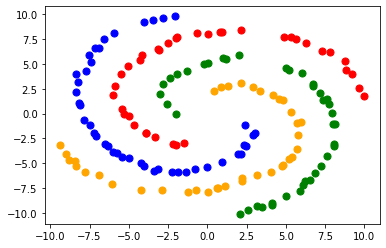

In [34]:
fig, ax = plt.subplots()

for n_class in range(4):
    ax.scatter(X_train[y_train==n_class][:, 0], 
               X_train[y_train==n_class][:, 1], 
               c=colours[n_class], 
               s=50,
               label=str(n_class))

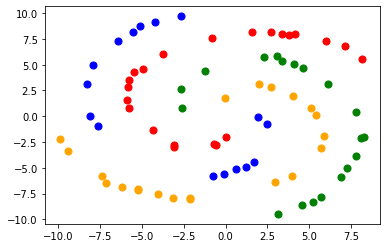

In [35]:
fig, ax = plt.subplots()

for n_class in range(4):
    ax.scatter(X_test[y_test==n_class][:, 0], 
               X_test[y_test==n_class][:, 1], 
               c=colours[n_class], 
               s=50, 
               label=str(n_class))

### Ad. 3. Designing the structure of a neural network. 

#### The four structures of the neural network will be considered later in the report:
#### a) 2L-SIG - single-layer neural network with the sigmoid activation function; number of
#### neurons in the hidden layer: 50 (Fig. 4),
#### b) 3L-SIG - double-layer neural network with the sigmoid activation function; number of
#### neurons in the hidden layer No. 1 / 2: 30 / 10 (Fig. 5). 


Following is a graph of how a sigmoid activation function might look like:



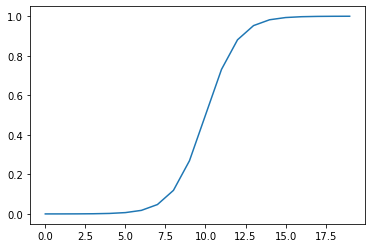

In [11]:
# Sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
sigmoid(A)

# Plot sigmoid modified tensor
print("Following is a graph of how a sigmoid activation function might look like:\n")

plt.plot(sigmoid(A));

Following is an example graph of a neural network with 1 hidden layer, in our use case we will have 50 neurons in the hidden layer:



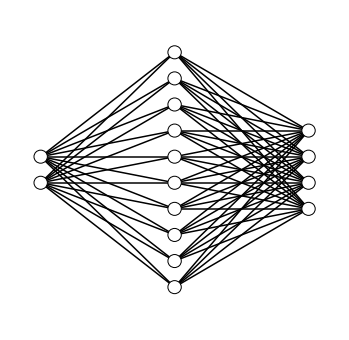

Following is an example graph of a neural network with 2 hidden layers, in our use case we will have 30 neurons in the first hidden layer, and 10 neurons in the second hidden layer:



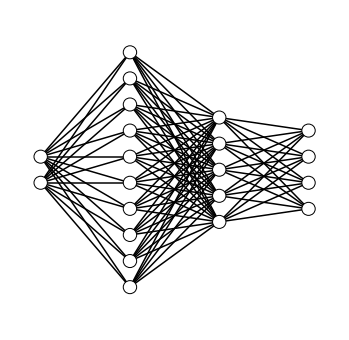

From left to right, the first layer is the input layer (x1, x2), the middle layers are hidden layers, and the last layer is the output layer (y1, y2, y3, y4)


In [12]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], color='k')
                ax.add_artist(line)
                
print("Following is an example graph of a neural network with 1 hidden layer, in our use case we will have 50 neurons in the hidden layer:\n")

fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [2, 10, 4])
plt.show()

print("Following is an example graph of a neural network with 2 hidden layers, in our use case we will have 30 neurons in the first hidden layer, and 10 neurons in the second hidden layer:\n")

fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [2, 10, 5, 4])
plt.show()

print("From left to right, the first layer is the input layer (x1, x2), the middle layers are hidden layers, and the last layer is the output layer (y1, y2, y3, y4)")

### Ad. 4. A. Learning processes of a double-layer neural network with continuous outputs (neurons with the sigmoid activation function) (2L-SIG)

--------------------------------------------------------------
Training for Learning Rate= 0.1 for 5000 Epochs, using the 2L-SIG Neural Net


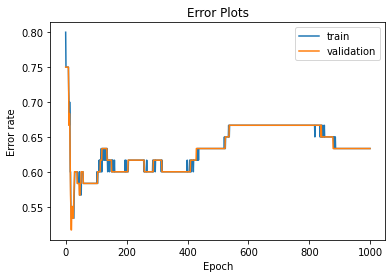

Finally, the learning error rate is: 0.6333333253860474
The test error rate is: 0.6333333253860474
The number of learning samples within 0.1 tolerance is: 0 out of 158
The number of test samples within 0.3 tolerance is: 0 out of 78
--------------------------------------------------------------
Training for Learning Rate= 0.2 for 5000 Epochs, using the 2L-SIG Neural Net


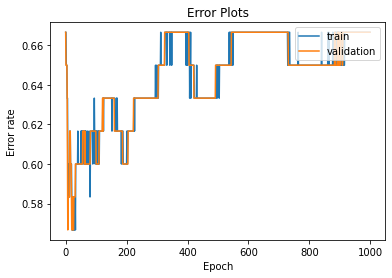

Finally, the learning error rate is: 0.6666666567325592
The test error rate is: 0.6666666567325592
The number of learning samples within 0.1 tolerance is: 0 out of 158
The number of test samples within 0.3 tolerance is: 0 out of 78
--------------------------------------------------------------
Training for Learning Rate= 0.4 for 5000 Epochs, using the 2L-SIG Neural Net


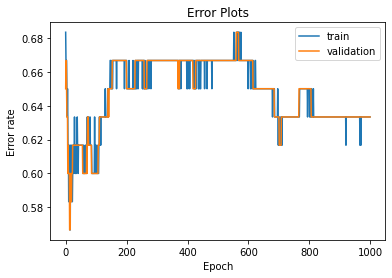

Finally, the learning error rate is: 0.6333333253860474
The test error rate is: 0.6333333253860474
The number of learning samples within 0.1 tolerance is: 0 out of 158
The number of test samples within 0.3 tolerance is: 0 out of 78
--------------------------------------------------------------
Training for Learning Rate= 0.6 for 5000 Epochs, using the 2L-SIG Neural Net


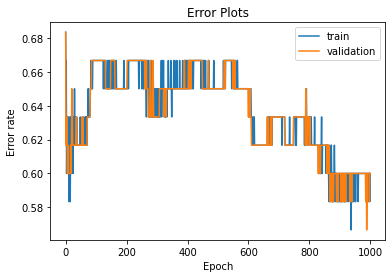

Finally, the learning error rate is: 0.5999999940395355
The test error rate is: 0.5999999940395355
The number of learning samples within 0.1 tolerance is: 0 out of 158
The number of test samples within 0.3 tolerance is: 0 out of 78
--------------------------------------------------------------
Training for Learning Rate= 0.8 for 5000 Epochs, using the 2L-SIG Neural Net


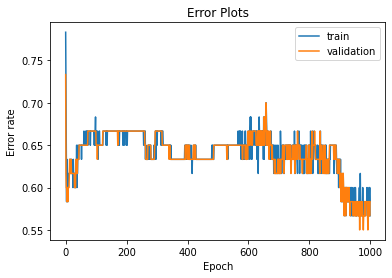

Finally, the learning error rate is: 0.5666666626930237
The test error rate is: 0.5833333432674408
The number of learning samples within 0.1 tolerance is: 0 out of 158
The number of test samples within 0.3 tolerance is: 0 out of 78
--------------------------------------------------------------
Training for Learning Rate= 0.9 for 5000 Epochs, using the 2L-SIG Neural Net


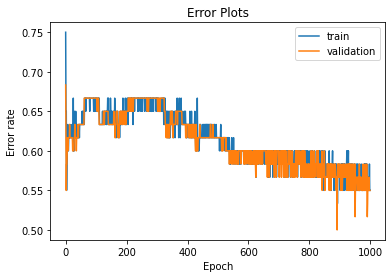

Finally, the learning error rate is: 0.550000011920929
The test error rate is: 0.550000011920929
The number of learning samples within 0.1 tolerance is: 0 out of 158
The number of test samples within 0.3 tolerance is: 0 out of 78


In [19]:
for learning_rate in learning_rates:
    print("--------------------------------------------------------------")
    print("Training for Learning Rate= " + str(learning_rate) + " for 5000 Epochs, using the 2L-SIG Neural Net")
    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(50, input_dim=2, activation=tf.nn.sigmoid),
        tf.keras.layers.Dense(4, input_dim=2, activation=tf.nn.sigmoid)
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(data, labels, epochs=5000, validation_split=0.25, shuffle=True, verbose = 0)

    # Extract the error rate for each epoch
    train_error_rate = [1 - x for x in history.history['accuracy']]
    val_error_rate = [1 - x for x in history.history['val_accuracy']]

    #  "Error plots"
    plt.plot(train_error_rate)
    plt.plot(val_error_rate)
    plt.title('Error Plots')
    plt.ylabel('Error rate')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()
    
    predictions = model.predict(X_train)
    predictions1 = model.predict(X_test)
    www = list(map(max, predictions-fin_y_train))
    xxx = list(map(max, predictions1-fin_y_test))
    result = np.abs(www)
    result1 = np.abs(xxx)
    accuracy = np.mean(result <= 0.1)
    accuracy1 = np.mean(result1 <= 0.3)
    
    
    print("Finally, the learning error rate is: " + str(train_error_rate[-1]))
    print("The test error rate is: " + str(val_error_rate[-1]))
    print("The number of learning samples within 0.1 tolerance is: " + str(int(accuracy*158)) + " out of 158")
    print("The number of test samples within 0.3 tolerance is: " + str(int(accuracy1*78)) + " out of 78")

--------------------------------------------------------------
Training for Momentum Factor= 0.2 for 5000 Epochs, using the 2L-SIG Neural Net


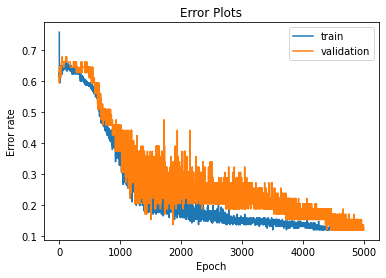

3/3 [==============================] - 0s 2ms/step
Finally, the learning error rate is: 0.12429380416870117
The test error rate is: 0.11864405870437622
The number of learning samples within 0.1 tolerance is: 115 out of 158
The number of test samples within 0.3 tolerance is: 60 out of 78
--------------------------------------------------------------
Training for Momentum Factor= 0.4 for 5000 Epochs, using the 2L-SIG Neural Net


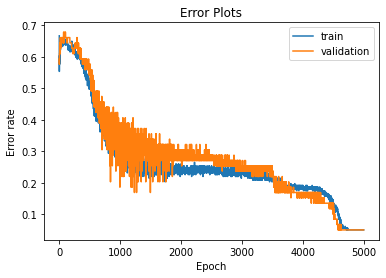

3/3 [==============================] - 0s 2ms/step
Finally, the learning error rate is: 0.05084747076034546
The test error rate is: 0.05084747076034546
The number of learning samples within 0.1 tolerance is: 116 out of 158
The number of test samples within 0.3 tolerance is: 69 out of 78
--------------------------------------------------------------
Training for Momentum Factor= 0.6 for 5000 Epochs, using the 2L-SIG Neural Net


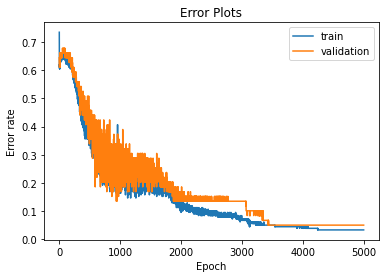

3/3 [==============================] - 0s 2ms/step
Finally, the learning error rate is: 0.03389829397201538
The test error rate is: 0.05084747076034546
The number of learning samples within 0.1 tolerance is: 148 out of 158
The number of test samples within 0.3 tolerance is: 73 out of 78
--------------------------------------------------------------
Training for Momentum Factor= 0.7 for 5000 Epochs, using the 2L-SIG Neural Net


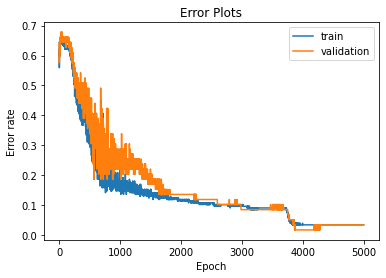

3/3 [==============================] - 0s 2ms/step
Finally, the learning error rate is: 0.03389829397201538
The test error rate is: 0.03389829397201538
The number of learning samples within 0.1 tolerance is: 150 out of 158
The number of test samples within 0.3 tolerance is: 74 out of 78
--------------------------------------------------------------
Training for Momentum Factor= 0.8 for 5000 Epochs, using the 2L-SIG Neural Net


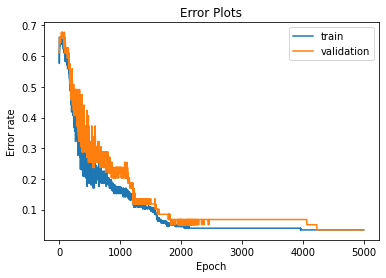

3/3 [==============================] - 0s 2ms/step
Finally, the learning error rate is: 0.03389829397201538
The test error rate is: 0.03389829397201538
The number of learning samples within 0.1 tolerance is: 150 out of 158
The number of test samples within 0.3 tolerance is: 74 out of 78
--------------------------------------------------------------
Training for Momentum Factor= 0.9 for 5000 Epochs, using the 2L-SIG Neural Net


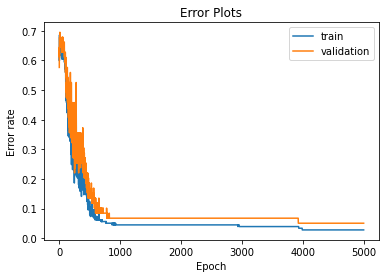

3/3 [==============================] - 0s 1ms/step
Finally, the learning error rate is: 0.028248608112335205
The test error rate is: 0.05084747076034546
The number of learning samples within 0.1 tolerance is: 149 out of 158
The number of test samples within 0.3 tolerance is: 74 out of 78


In [93]:
for momentum_factor in momentum_factors:
    print("--------------------------------------------------------------")
    print("Training for Momentum Factor= " + str(momentum_factor) + " for 5000 Epochs, using the 2L-SIG Neural Net")
    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(50, input_dim=2, activation=tf.nn.sigmoid),
        tf.keras.layers.Dense(4, input_dim=2, activation=tf.nn.sigmoid)
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.4, momentum= momentum_factor),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(data, labels, epochs=5000, validation_split=0.25, shuffle=True, verbose = 0)

    # Extract the error rate for each epoch
    train_error_rate = [1 - x for x in history.history['accuracy']]
    val_error_rate = [1 - x for x in history.history['val_accuracy']]

    #  "Error plots"
    plt.plot(train_error_rate)
    plt.plot(val_error_rate)
    plt.title('Error Plots')
    plt.ylabel('Error rate')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()
    
    predictions = model.predict(X_train)
    predictions1 = model.predict(X_test)
    www = list(map(max, predictions-fin_y_train))
    xxx = list(map(max, predictions1-fin_y_test))
    result = np.abs(www)
    result1 = np.abs(xxx)
    accuracy = np.mean(result <= 0.1)
    accuracy1 = np.mean(result1 <= 0.3)
    
    
    print("Finally, the learning error rate is: " + str(train_error_rate[-1]))
    print("The test error rate is: " + str(val_error_rate[-1]))
    print("The number of learning samples within 0.1 tolerance is: " + str(int(accuracy*158)) + " out of 158")
    print("The number of test samples within 0.3 tolerance is: " + str(int(accuracy1*78)) + " out of 78")

--------------------------------------------------------------
Shuffle True


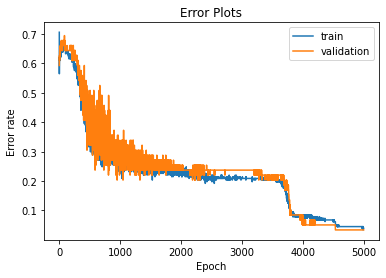

3/3 [==============================] - 0s 2ms/step
Finally, the learning error rate is: 0.03954803943634033
The test error rate is: 0.03389829397201538
The number of learning samples within 0.1 tolerance is: 147 out of 158
The number of test samples within 0.3 tolerance is: 72 out of 78


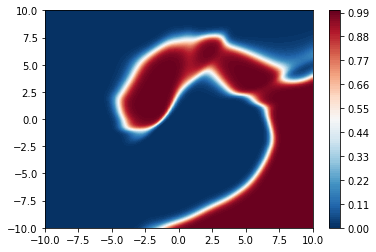

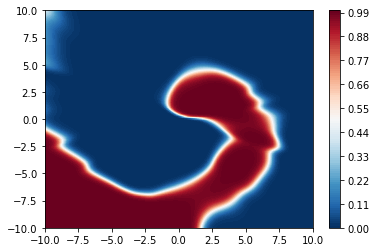

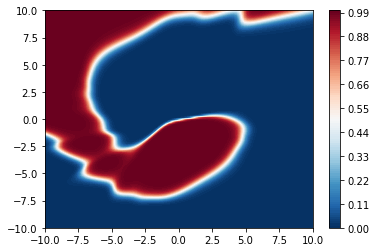

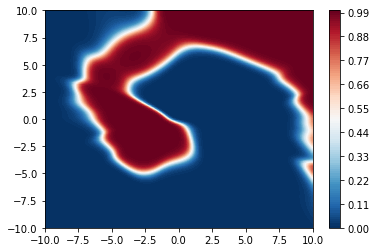

--------------------------------------------------------------
Shuffle False


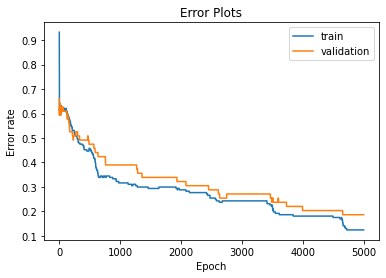

3/3 [==============================] - 0s 2ms/step
Finally, the learning error rate is: 0.12429380416870117
The test error rate is: 0.18644070625305176
The number of learning samples within 0.1 tolerance is: 138 out of 158
The number of test samples within 0.3 tolerance is: 70 out of 78
--------------------------------------------------------------
Shuffle True, batch size = training dataset size


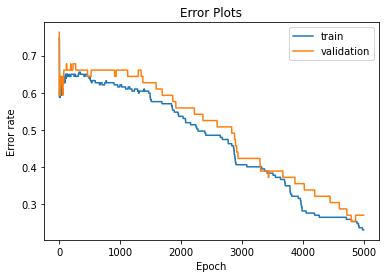

3/3 [==============================] - 0s 2ms/step
Finally, the learning error rate is: 0.23163843154907227
The test error rate is: 0.2711864113807678
The number of learning samples within 0.1 tolerance is: 2 out of 158
The number of test samples within 0.3 tolerance is: 29 out of 78


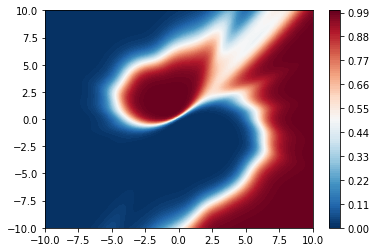

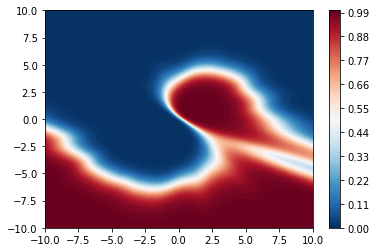

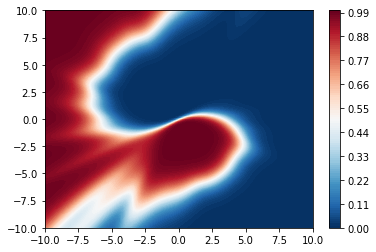

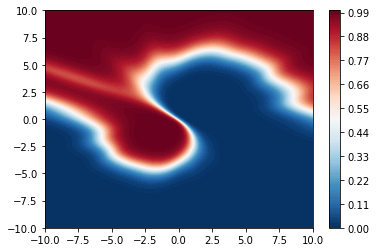

In [94]:
    print("--------------------------------------------------------------")
    print("Shuffle True")
    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(50, input_dim=2, activation=tf.nn.sigmoid),
        tf.keras.layers.Dense(4, input_dim=2, activation=tf.nn.sigmoid)
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.4, momentum= 0.6),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(data, labels, epochs=5000, validation_split=0.25, shuffle=True, verbose = 0)

    # Extract the error rate for each epoch
    train_error_rate = [1 - x for x in history.history['accuracy']]
    val_error_rate = [1 - x for x in history.history['val_accuracy']]

    #  "Error plots"
    plt.plot(train_error_rate)
    plt.plot(val_error_rate)
    plt.title('Error Plots')
    plt.ylabel('Error rate')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()
    
    predictions = model.predict(X_train)
    predictions1 = model.predict(X_test)
    www = list(map(max, predictions-fin_y_train))
    xxx = list(map(max, predictions1-fin_y_test))
    result = np.abs(www)
    result1 = np.abs(xxx)
    accuracy = np.mean(result <= 0.1)
    accuracy1 = np.mean(result1 <= 0.3)
    
    
    print("Finally, the learning error rate is: " + str(train_error_rate[-1]))
    print("The test error rate is: " + str(val_error_rate[-1]))
    print("The number of learning samples within 0.1 tolerance is: " + str(int(accuracy*158)) + " out of 158")
    print("The number of test samples within 0.3 tolerance is: " + str(int(accuracy1*78)) + " out of 78")
   
    # Get weights and biases for the first layer
    for i in range(4):
        # Define input data
        x = np.linspace(-10, 10, num=100)
        y = np.linspace(-10, 10, num=100)
        X, Y = np.meshgrid(x, y)
        Z = np.c_[X.ravel(), Y.ravel()]

        # Compute the activation function for the first layer
        weights1, biases1 = model.layers[0].get_weights()
        z1 = np.dot(Z, weights1) + biases1
        z1 = 1 / (1 + np.exp(-z1))

        # Compute the activation function for the second layer
        weights2, biases2 = model.layers[1].get_weights()
        z2 = np.dot(z1, weights2) + biases2
        z2 = 1 / (1 + np.exp(-z2))

        # Plot the decision boundary for the first neuron in the second layer
        plt.contourf(X, Y, z2[:, i].reshape(100, 100), levels=100, cmap='RdBu_r')
        plt.colorbar()
        plt.show()


    print("--------------------------------------------------------------")
    print("Shuffle False")
    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(50, input_dim=2, activation=tf.nn.sigmoid),
        tf.keras.layers.Dense(4, input_dim=2, activation=tf.nn.sigmoid)
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.4, momentum= 0.6),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(data, labels, epochs=5000, validation_split=0.25, shuffle=False, verbose = 0)

    # Extract the error rate for each epoch
    train_error_rate = [1 - x for x in history.history['accuracy']]
    val_error_rate = [1 - x for x in history.history['val_accuracy']]

    #  "Error plots"
    plt.plot(train_error_rate)
    plt.plot(val_error_rate)
    plt.title('Error Plots')
    plt.ylabel('Error rate')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()
    
    predictions = model.predict(X_train)
    predictions1 = model.predict(X_test)
    www = list(map(max, predictions-fin_y_train))
    xxx = list(map(max, predictions1-fin_y_test))
    result = np.abs(www)
    result1 = np.abs(xxx)
    accuracy = np.mean(result <= 0.1)
    accuracy1 = np.mean(result1 <= 0.3)
    
    
    print("Finally, the learning error rate is: " + str(train_error_rate[-1]))
    print("The test error rate is: " + str(val_error_rate[-1]))
    print("The number of learning samples within 0.1 tolerance is: " + str(int(accuracy*158)) + " out of 158")
    print("The number of test samples within 0.3 tolerance is: " + str(int(accuracy1*78)) + " out of 78")

    
    
    print("--------------------------------------------------------------")
    print("Shuffle True, batch size = training dataset size")
    
    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(50, input_dim=2, activation=tf.nn.sigmoid),
        tf.keras.layers.Dense(4, input_dim=2, activation=tf.nn.sigmoid)
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.4, momentum= 0.6),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(data, labels, epochs=5000, validation_split=0.25, shuffle=True, batch_size = 177, verbose = 0)

    # Extract the error rate for each epoch
    train_error_rate = [1 - x for x in history.history['accuracy']]
    val_error_rate = [1 - x for x in history.history['val_accuracy']]

    #  "Error plots"
    plt.plot(train_error_rate)
    plt.plot(val_error_rate)
    plt.title('Error Plots')
    plt.ylabel('Error rate')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()
    
    predictions = model.predict(X_train)
    predictions1 = model.predict(X_test)
    www = list(map(max, predictions-fin_y_train))
    xxx = list(map(max, predictions1-fin_y_test))
    result = np.abs(www)
    result1 = np.abs(xxx)
    accuracy = np.mean(result <= 0.1)
    accuracy1 = np.mean(result1 <= 0.3)
    
    
    print("Finally, the learning error rate is: " + str(train_error_rate[-1]))
    print("The test error rate is: " + str(val_error_rate[-1]))
    print("The number of learning samples within 0.1 tolerance is: " + str(int(accuracy*158)) + " out of 158")
    print("The number of test samples within 0.3 tolerance is: " + str(int(accuracy1*78)) + " out of 78")
    
    
    # Get weights and biases for the first layer
    for i in range(4):
        # Define input data
        x = np.linspace(-10, 10, num=100)
        y = np.linspace(-10, 10, num=100)
        X, Y = np.meshgrid(x, y)
        Z = np.c_[X.ravel(), Y.ravel()]

        # Compute the activation function for the first layer
        weights1, biases1 = model.layers[0].get_weights()
        z1 = np.dot(Z, weights1) + biases1
        z1 = 1 / (1 + np.exp(-z1))

        # Compute the activation function for the second layer
        weights2, biases2 = model.layers[1].get_weights()
        z2 = np.dot(z1, weights2) + biases2
        z2 = 1 / (1 + np.exp(-z2))

        # Plot the decision boundary for the first neuron in the second layer
        plt.contourf(X, Y, z2[:, i].reshape(100, 100), levels=100, cmap='RdBu_r')
        plt.colorbar()
        plt.show()

### Ad. 4. B. Learning processes of a three-layer neural network with continuous outputs (neurons with the signum activation function) (3L-SIG)

--------------------------------------------------------------
Training for Learning Rate= 0.1 for 5000 Epochs, using the 2L-SIG Neural Net


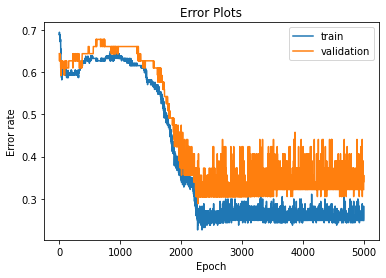

3/3 [==============================] - 0s 2ms/step
Finally, the learning error rate is: 0.24858754873275757
The test error rate is: 0.3220338821411133
The number of learning samples within 0.1 tolerance is: 82 out of 158
The number of test samples within 0.3 tolerance is: 47 out of 78
--------------------------------------------------------------
Training for Learning Rate= 0.2 for 5000 Epochs, using the 2L-SIG Neural Net


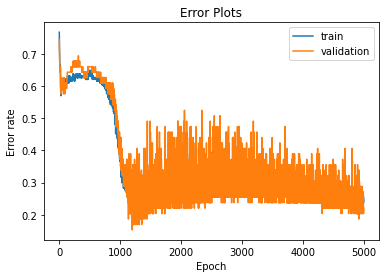

3/3 [==============================] - 0s 2ms/step
Finally, the learning error rate is: 0.24858754873275757
The test error rate is: 0.22033900022506714
The number of learning samples within 0.1 tolerance is: 98 out of 158
The number of test samples within 0.3 tolerance is: 51 out of 78
--------------------------------------------------------------
Training for Learning Rate= 0.4 for 5000 Epochs, using the 2L-SIG Neural Net


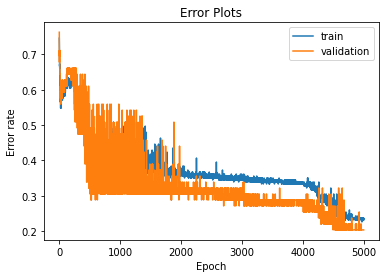

3/3 [==============================] - 0s 1ms/step
Finally, the learning error rate is: 0.23163843154907227
The test error rate is: 0.20338982343673706
The number of learning samples within 0.1 tolerance is: 120 out of 158
The number of test samples within 0.3 tolerance is: 57 out of 78
--------------------------------------------------------------
Training for Learning Rate= 0.6 for 5000 Epochs, using the 2L-SIG Neural Net


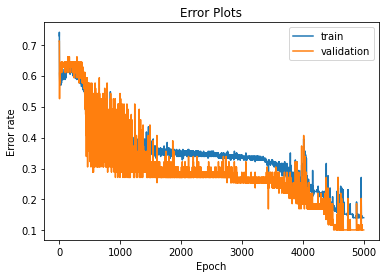

3/3 [==============================] - 0s 2ms/step
Finally, the learning error rate is: 0.14124292135238647
The test error rate is: 0.10169494152069092
The number of learning samples within 0.1 tolerance is: 137 out of 158
The number of test samples within 0.3 tolerance is: 66 out of 78
--------------------------------------------------------------
Training for Learning Rate= 0.8 for 5000 Epochs, using the 2L-SIG Neural Net


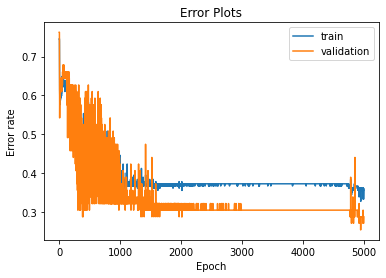

3/3 [==============================] - 0s 2ms/step
Finally, the learning error rate is: 0.35593217611312866
The test error rate is: 0.2881355881690979
The number of learning samples within 0.1 tolerance is: 102 out of 158
The number of test samples within 0.3 tolerance is: 46 out of 78
--------------------------------------------------------------
Training for Learning Rate= 0.9 for 5000 Epochs, using the 2L-SIG Neural Net


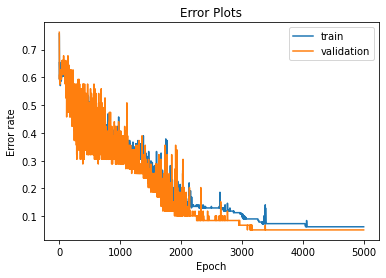

3/3 [==============================] - 0s 2ms/step
Finally, the learning error rate is: 0.062146902084350586
The test error rate is: 0.05084747076034546
The number of learning samples within 0.1 tolerance is: 151 out of 158
The number of test samples within 0.3 tolerance is: 72 out of 78


In [95]:
for learning_rate in learning_rates:
    print("--------------------------------------------------------------")
    print("Training for Learning Rate= " + str(learning_rate) + " for 5000 Epochs, using the 2L-SIG Neural Net")
    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(30, input_dim=2, activation=tf.nn.sigmoid),
        tf.keras.layers.Dense(10, input_dim=2, activation=tf.nn.sigmoid),
        tf.keras.layers.Dense(4, input_dim=2, activation=tf.nn.sigmoid)
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(data, labels, epochs=5000, validation_split=0.25, shuffle=True, verbose = 0)

    # Extract the error rate for each epoch
    train_error_rate = [1 - x for x in history.history['accuracy']]
    val_error_rate = [1 - x for x in history.history['val_accuracy']]

    #  "Error plots"
    plt.plot(train_error_rate)
    plt.plot(val_error_rate)
    plt.title('Error Plots')
    plt.ylabel('Error rate')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()
    
    predictions = model.predict(X_train)
    predictions1 = model.predict(X_test)
    www = list(map(max, predictions-fin_y_train))
    xxx = list(map(max, predictions1-fin_y_test))
    result = np.abs(www)
    result1 = np.abs(xxx)
    accuracy = np.mean(result <= 0.1)
    accuracy1 = np.mean(result1 <= 0.3)
    
    
    print("Finally, the learning error rate is: " + str(train_error_rate[-1]))
    print("The test error rate is: " + str(val_error_rate[-1]))
    print("The number of learning samples within 0.1 tolerance is: " + str(int(accuracy*158)) + " out of 158")
    print("The number of test samples within 0.3 tolerance is: " + str(int(accuracy1*78)) + " out of 78")

--------------------------------------------------------------
Training for Momentum Factor= 0.2 for 5000 Epochs, using the 3L-SIG Neural Net


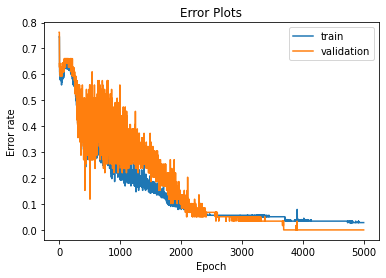

3/3 [==============================] - 0s 2ms/step
Finally, the learning error rate is: 0.028248608112335205
The test error rate is: 0.0
The number of learning samples within 0.1 tolerance is: 153 out of 158
The number of test samples within 0.3 tolerance is: 71 out of 78
--------------------------------------------------------------
Training for Momentum Factor= 0.4 for 5000 Epochs, using the 3L-SIG Neural Net


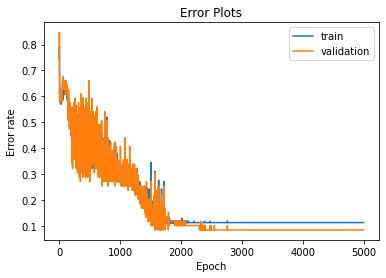

3/3 [==============================] - 0s 1ms/step
Finally, the learning error rate is: 0.11299437284469604
The test error rate is: 0.08474576473236084
The number of learning samples within 0.1 tolerance is: 141 out of 158
The number of test samples within 0.3 tolerance is: 68 out of 78
--------------------------------------------------------------
Training for Momentum Factor= 0.6 for 5000 Epochs, using the 3L-SIG Neural Net


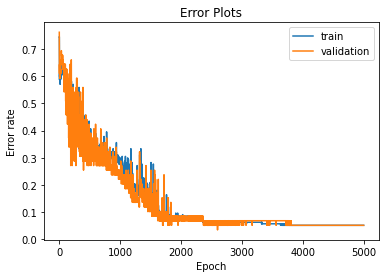

3/3 [==============================] - 0s 2ms/step
Finally, the learning error rate is: 0.05084747076034546
The test error rate is: 0.05084747076034546
The number of learning samples within 0.1 tolerance is: 148 out of 158
The number of test samples within 0.3 tolerance is: 74 out of 78
--------------------------------------------------------------
Training for Momentum Factor= 0.7 for 5000 Epochs, using the 3L-SIG Neural Net


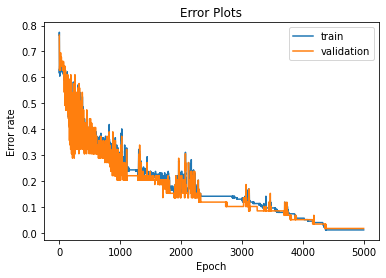

3/3 [==============================] - 0s 2ms/step
Finally, the learning error rate is: 0.011299431324005127
The test error rate is: 0.016949176788330078
The number of learning samples within 0.1 tolerance is: 156 out of 158
The number of test samples within 0.3 tolerance is: 77 out of 78
--------------------------------------------------------------
Training for Momentum Factor= 0.8 for 5000 Epochs, using the 3L-SIG Neural Net


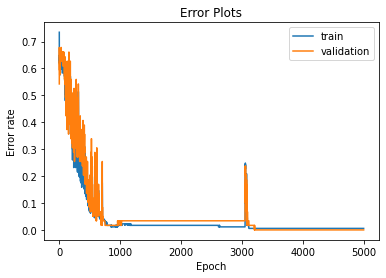

3/3 [==============================] - 0s 1ms/step
Finally, the learning error rate is: 0.005649745464324951
The test error rate is: 0.0
The number of learning samples within 0.1 tolerance is: 156 out of 158
The number of test samples within 0.3 tolerance is: 78 out of 78
--------------------------------------------------------------
Training for Momentum Factor= 0.9 for 5000 Epochs, using the 3L-SIG Neural Net


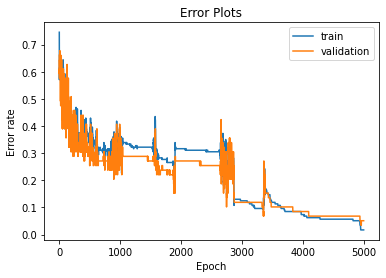

3/3 [==============================] - 0s 1ms/step
Finally, the learning error rate is: 0.016949176788330078
The test error rate is: 0.05084747076034546
The number of learning samples within 0.1 tolerance is: 146 out of 158
The number of test samples within 0.3 tolerance is: 72 out of 78


In [96]:
for momentum_factor in momentum_factors:
    print("--------------------------------------------------------------")
    print("Training for Momentum Factor= " + str(momentum_factor) + " for 5000 Epochs, using the 3L-SIG Neural Net")
    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(30, input_dim=2, activation=tf.nn.sigmoid),
        tf.keras.layers.Dense(10, input_dim=2, activation=tf.nn.sigmoid),
        tf.keras.layers.Dense(4, input_dim=2, activation=tf.nn.sigmoid)
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.6, momentum= momentum_factor),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(data, labels, epochs=5000, validation_split=0.25, shuffle=True, verbose = 0)

    # Extract the error rate for each epoch
    train_error_rate = [1 - x for x in history.history['accuracy']]
    val_error_rate = [1 - x for x in history.history['val_accuracy']]

    #  "Error plots"
    plt.plot(train_error_rate)
    plt.plot(val_error_rate)
    plt.title('Error Plots')
    plt.ylabel('Error rate')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()
    
    predictions = model.predict(X_train)
    predictions1 = model.predict(X_test)
    www = list(map(max, predictions-fin_y_train))
    xxx = list(map(max, predictions1-fin_y_test))
    result = np.abs(www)
    result1 = np.abs(xxx)
    accuracy = np.mean(result <= 0.1)
    accuracy1 = np.mean(result1 <= 0.3)
    
    
    print("Finally, the learning error rate is: " + str(train_error_rate[-1]))
    print("The test error rate is: " + str(val_error_rate[-1]))
    print("The number of learning samples within 0.1 tolerance is: " + str(int(accuracy*158)) + " out of 158")
    print("The number of test samples within 0.3 tolerance is: " + str(int(accuracy1*78)) + " out of 78")

--------------------------------------------------------------
Shuffle True


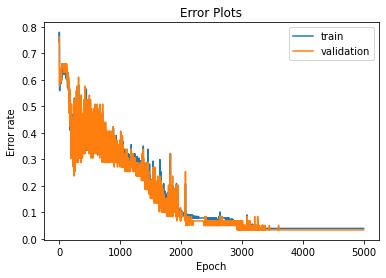

3/3 [==============================] - 0s 2ms/step
Finally, the learning error rate is: 0.03954803943634033
The test error rate is: 0.03389829397201538
The number of learning samples within 0.1 tolerance is: 150 out of 158
The number of test samples within 0.3 tolerance is: 72 out of 78
--------------------------------------------------------------
Shuffle False


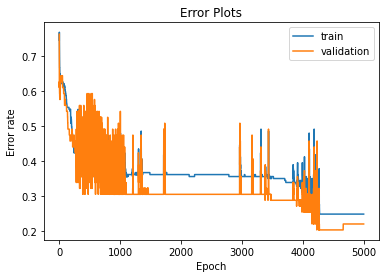

3/3 [==============================] - 0s 1ms/step
Finally, the learning error rate is: 0.24858754873275757
The test error rate is: 0.22033900022506714
The number of learning samples within 0.1 tolerance is: 121 out of 158
The number of test samples within 0.3 tolerance is: 56 out of 78


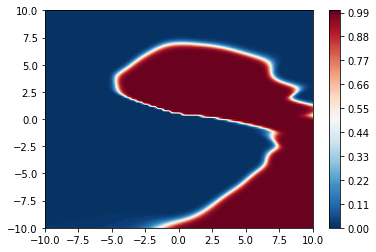

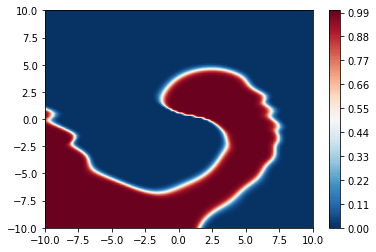

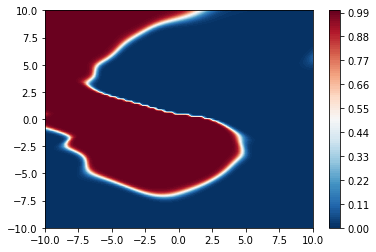

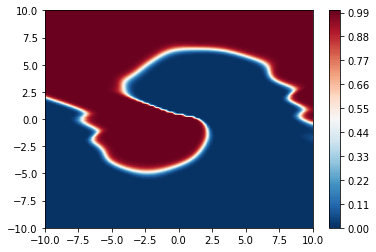

--------------------------------------------------------------
Shuffle True, batch size = training dataset size


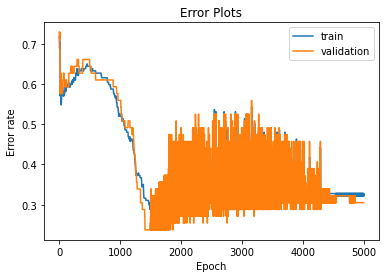

3/3 [==============================] - 0s 2ms/step
Finally, the learning error rate is: 0.3220338821411133
The test error rate is: 0.305084764957428
The number of learning samples within 0.1 tolerance is: 83 out of 158
The number of test samples within 0.3 tolerance is: 44 out of 78


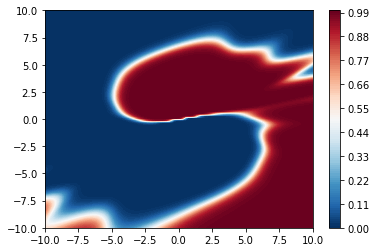

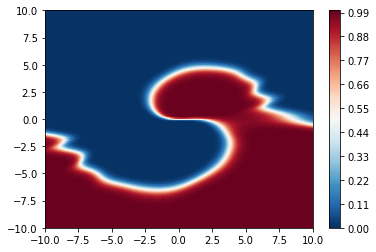

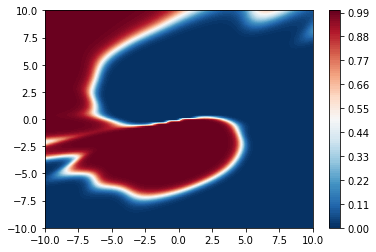

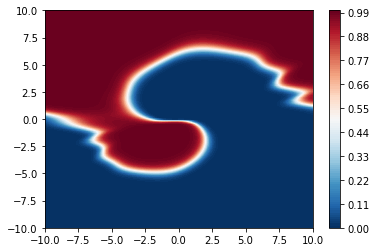

In [97]:
    print("--------------------------------------------------------------")
    print("Shuffle True")
    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(30, input_dim=2, activation=tf.nn.sigmoid),
        tf.keras.layers.Dense(10, input_dim=2, activation=tf.nn.sigmoid),
        tf.keras.layers.Dense(4, input_dim=2, activation=tf.nn.sigmoid)
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.4, momentum= 0.6),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(data, labels, epochs=5000, validation_split=0.25, shuffle=True, verbose = 0)

    # Extract the error rate for each epoch
    train_error_rate = [1 - x for x in history.history['accuracy']]
    val_error_rate = [1 - x for x in history.history['val_accuracy']]

    #  "Error plots"
    plt.plot(train_error_rate)
    plt.plot(val_error_rate)
    plt.title('Error Plots')
    plt.ylabel('Error rate')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()
    
    predictions = model.predict(X_train)
    predictions1 = model.predict(X_test)
    www = list(map(max, predictions-fin_y_train))
    xxx = list(map(max, predictions1-fin_y_test))
    result = np.abs(www)
    result1 = np.abs(xxx)
    accuracy = np.mean(result <= 0.1)
    accuracy1 = np.mean(result1 <= 0.3)
    
    
    print("Finally, the learning error rate is: " + str(train_error_rate[-1]))
    print("The test error rate is: " + str(val_error_rate[-1]))
    print("The number of learning samples within 0.1 tolerance is: " + str(int(accuracy*158)) + " out of 158")
    print("The number of test samples within 0.3 tolerance is: " + str(int(accuracy1*78)) + " out of 78")
   

    print("--------------------------------------------------------------")
    print("Shuffle False")
    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(30, input_dim=2, activation=tf.nn.sigmoid),
        tf.keras.layers.Dense(10, input_dim=2, activation=tf.nn.sigmoid),
        tf.keras.layers.Dense(4, input_dim=2, activation=tf.nn.sigmoid)
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.4, momentum= 0.6),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(data, labels, epochs=5000, validation_split=0.25, shuffle=False, verbose = 0)

    # Extract the error rate for each epoch
    train_error_rate = [1 - x for x in history.history['accuracy']]
    val_error_rate = [1 - x for x in history.history['val_accuracy']]

    #  "Error plots"
    plt.plot(train_error_rate)
    plt.plot(val_error_rate)
    plt.title('Error Plots')
    plt.ylabel('Error rate')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()
    
    predictions = model.predict(X_train)
    predictions1 = model.predict(X_test)
    www = list(map(max, predictions-fin_y_train))
    xxx = list(map(max, predictions1-fin_y_test))
    result = np.abs(www)
    result1 = np.abs(xxx)
    accuracy = np.mean(result <= 0.1)
    accuracy1 = np.mean(result1 <= 0.3)
    
    
    print("Finally, the learning error rate is: " + str(train_error_rate[-1]))
    print("The test error rate is: " + str(val_error_rate[-1]))
    print("The number of learning samples within 0.1 tolerance is: " + str(int(accuracy*158)) + " out of 158")
    print("The number of test samples within 0.3 tolerance is: " + str(int(accuracy1*78)) + " out of 78")
    
    for i in range(4):
        # Define input data
        x = np.linspace(-10, 10, num=100)
        y = np.linspace(-10, 10, num=100)
        X, Y = np.meshgrid(x, y)
        Z = np.c_[X.ravel(), Y.ravel()]

        # Compute the activation function for the first layer
        weights1, biases1 = model.layers[0].get_weights()
        z1 = np.dot(Z, weights1) + biases1
        z1 = 1 / (1 + np.exp(-z1))

        # Compute the activation function for the second layer
        weights2, biases2 = model.layers[1].get_weights()
        z2 = np.dot(z1, weights2) + biases2
        z2 = 1 / (1 + np.exp(-z2))
        
        # Compute the activation function for the third layer
        weights3, biases3 = model.layers[2].get_weights()
        z3 = np.dot(z2, weights3) + biases3
        z3 = 1 / (1 + np.exp(-z3))

        # Plot the decision boundary for the first neuron in the third layer
        plt.contourf(X, Y, z3[:, i].reshape(100, 100), levels=100, cmap='RdBu_r')
        plt.colorbar()
        plt.show()
    
    
    print("--------------------------------------------------------------")
    print("Shuffle True, batch size = training dataset size")
    
    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(30, input_dim=2, activation=tf.nn.sigmoid),
        tf.keras.layers.Dense(10, input_dim=2, activation=tf.nn.sigmoid),
        tf.keras.layers.Dense(4, input_dim=2, activation=tf.nn.sigmoid)
    ])

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.4, momentum= 0.6),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(data, labels, epochs=5000, validation_split=0.25, shuffle=True, batch_size = 177, verbose = 0)

    # Extract the error rate for each epoch
    train_error_rate = [1 - x for x in history.history['accuracy']]
    val_error_rate = [1 - x for x in history.history['val_accuracy']]

    #  "Error plots"
    plt.plot(train_error_rate)
    plt.plot(val_error_rate)
    plt.title('Error Plots')
    plt.ylabel('Error rate')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()
    
    predictions = model.predict(X_train)
    predictions1 = model.predict(X_test)
    www = list(map(max, predictions-fin_y_train))
    xxx = list(map(max, predictions1-fin_y_test))
    result = np.abs(www)
    result1 = np.abs(xxx)
    accuracy = np.mean(result <= 0.1)
    accuracy1 = np.mean(result1 <= 0.3)
    
    print("Finally, the learning error rate is: " + str(train_error_rate[-1]))
    print("The test error rate is: " + str(val_error_rate[-1]))
    print("The number of learning samples within 0.1 tolerance is: " + str(int(accuracy*158)) + " out of 158")
    print("The number of test samples within 0.3 tolerance is: " + str(int(accuracy1*78)) + " out of 78")
    
    for i in range(4):
        # Define input data
        x = np.linspace(-10, 10, num=100)
        y = np.linspace(-10, 10, num=100)
        X, Y = np.meshgrid(x, y)
        Z = np.c_[X.ravel(), Y.ravel()]

        # Compute the activation function for the first layer
        weights1, biases1 = model.layers[0].get_weights()
        z1 = np.dot(Z, weights1) + biases1
        z1 = 1 / (1 + np.exp(-z1))

        # Compute the activation function for the second layer
        weights2, biases2 = model.layers[1].get_weights()
        z2 = np.dot(z1, weights2) + biases2
        z2 = 1 / (1 + np.exp(-z2))
        
        # Compute the activation function for the third layer
        weights3, biases3 = model.layers[2].get_weights()
        z3 = np.dot(z2, weights3) + biases3
        z3 = 1 / (1 + np.exp(-z3))

        # Plot the decision boundary for the first neuron in the third layer
        plt.contourf(X, Y, z3[:, i].reshape(100, 100), levels=100, cmap='RdBu_r')
        plt.colorbar()
        plt.show()